Fetch Data

In [169]:
import pandas as pd
from pycaret.time_series import *
import matplotlib.pyplot as plt
from fetch_data import fetch_data

In [170]:
df = fetch_data()

[*********************100%***********************]  30 of 30 completed


In [171]:
df.index = pd.to_datetime(df.index)
df = df.sort_index()

BTC-USD Prophet Model

In [48]:
btc = df.loc[:,'BTC-USD']
btc.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 365 entries, 2024-04-30 to 2025-04-29
Series name: BTC-USD
Non-Null Count  Dtype  
--------------  -----  
365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [18]:
# Set up PyCaret environment
s = setup(data=btc, 
          target = 'BTC-USD',
          #transform_target='log',
          fh=30,  # Forecast horizon
          session_id=123,
          fold_strategy='expanding',
          seasonal_period='D',
          #fold_spans="adaptive",
          numeric_imputation_target = 'drift')

,Description,Value
0,session_id,123
1,Target,BTC-USD
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(365, 1)"
5,Transformed data shape,"(365, 1)"
6,Transformed train set shape,"(335, 1)"
7,Transformed test set shape,"(30, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [74]:
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
exp_smooth,Exponential Smoothing,0.6522,0.5887,136.6378,166.7971,0.0529,0.0522,0.1251,0.1033
ets,ETS,1.0164,0.8720,212.6287,246.5809,0.0836,0.0785,-0.8882,0.1067
arima,ARIMA,1.1009,0.9622,230.3140,272.0233,0.0916,0.0852,-1.2898,0.1500
theta,Theta Forecaster,1.2312,1.0335,257.4473,291.9464,0.1052,0.0977,-1.7004,0.0700
naive,Naive Forecaster,1.2483,1.0399,261.0802,293.7721,0.1068,0.0991,-1.7372,1.5900
auto_arima,Auto ARIMA,1.2483,1.0399,261.0802,293.7721,0.1068,0.0991,-1.7372,0.9933
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,1.3970,1.1522,292.0257,325.3238,0.1202,0.1104,-2.4133,0.9633
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,1.4459,1.1712,302.5953,331.0876,0.1219,0.1122,-2.4031,0.5967
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,1.4592,1.2201,305.0520,344.3882,0.1297,0.1183,-3.2271,0.4933
stlf,STLF,1.4798,1.2344,309.6086,348.8524,0.1270,0.1162,-2.8640,0.0633


In [ ]:
prophet = create_model('prophet')


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-29,4.3335,3.3083,15941.5152,16243.0916,0.1613,0.1488,-14.1562
1,2025-01-28,1.7729,1.6145,6667.6259,7999.9335,0.0714,0.0678,-2.2940
2,2025-02-27,2.9461,2.3014,10924.6281,11348.9504,0.1296,0.1211,-12.6630
Mean,NaT,3.0175,2.4081,11177.9231,11863.9918,0.1208,0.1126,-9.7044
SD,NaT,1.0466,0.6956,3790.2836,3384.9042,0.0372,0.0336,5.2753


In [ ]:
tuned_prophet = tune_model(prophet)


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-29,3.6340,2.8134,13368.3500,13813.2582,0.1336,0.1437,-9.9609
1,2025-01-28,1.3519,1.2338,5084.2460,6113.6881,0.0527,0.0536,-0.9238
2,2025-02-27,1.6794,1.3778,6227.2964,6794.6910,0.0742,0.0711,-3.8975
Mean,NaT,2.2217,1.8084,8226.6308,8907.2124,0.0868,0.0894,-4.9274
SD,NaT,1.0075,0.7131,3665.5694,3480.2208,0.0342,0.0390,3.7606


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.0s finished


In [21]:
print(tuned_prophet)

ProphetPeriodPatched(changepoint_prior_scale=0.0016825782489797436,
                     holidays_prior_scale=1.370851918470622,
                     seasonality_mode='multiplicative',
                     seasonality_prior_scale=0.8002079756292475)


In [22]:
# Predictions
final_prophet = finalize_model(tuned_prophet)
#future_dates = pd.date_range(df.index[-1], periods=30, freq='D')
prophet_predictions = predict_model(final_prophet)
#arima_predictions = predict_model(tuned_arima, fh=30)

In [80]:
import plotly.io as pio

In [27]:
#Plot prophet model forecast
fig = plot_model(final_prophet, plot='forecast', return_fig=True)

# Save it as an HTML file
pio.write_html(fig, file='forecast_chart.html', auto_open=False)



BTC-USD Exponential Smoothing Model

In [77]:
# Set up PyCaret environment
s = setup(data=btc, 
          target = 'BTC-USD',
          #transform_target='log',
          fh=30,  # Forecast horizon
          session_id=123,
          fold_strategy='expanding',
          seasonal_period='D',
          #fold_spans="adaptive",
          numeric_imputation_target = 'drift')

exp = create_model('exp_smooth')
tuned_exp = tune_model(exp)
final_exp = finalize_model(tuned_exp)
exp_prediction = predict_model(final_exp)

,Description,Value
0,session_id,123
1,Target,BTC-USD
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(365, 1)"
5,Transformed data shape,"(365, 1)"
6,Transformed train set shape,"(335, 1)"
7,Transformed test set shape,"(30, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-30,1.9228,1.6692,7084.3483,8197.9740,0.0696,0.0729,-3.0635
1,2025-01-29,2.0080,1.7721,7547.2148,8780.8794,0.0814,0.0769,-2.4779
2,2025-02-28,0.6415,0.6627,2402.6792,3298.8551,0.0277,0.0281,-0.1246
Mean,NaT,1.5241,1.3680,5678.0808,6759.2361,0.0596,0.0593,-1.8887
SD,NaT,0.6250,0.5005,2323.7546,2458.4036,0.0230,0.0221,1.2701


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-30,1.7991,1.5826,6628.7505,7772.5482,0.0650,0.0680,-2.6527
1,2025-01-29,2.0234,1.7900,7605.1908,8869.4623,0.0820,0.0775,-2.5485
2,2025-02-28,0.6386,0.6561,2391.8381,3266.2645,0.0276,0.0280,-0.1025
Mean,NaT,1.4871,1.3429,5541.9265,6636.0917,0.0582,0.0578,-1.7679
SD,NaT,0.6069,0.4929,2262.8377,2424.5421,0.0227,0.0215,1.1784


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.2s finished


In [78]:
plot_model(final_exp, plot='forecast')

BTC-USD ARIMA Model

In [ ]:
arima = create_model('arima')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-09,1.3333,1.1959,4806.9143,5762.3896,0.0496,0.0483,-1.6626
1,2025-01-08,1.0532,0.8966,3837.7182,4332.6144,0.0383,0.0384,-0.2665
2,2025-02-07,1.3397,1.3018,4980.6148,6356.8002,0.0566,0.0543,-0.4456
Mean,NaT,1.2421,1.1314,4541.7491,5483.9347,0.0482,0.0470,-0.7916
SD,NaT,0.1336,0.1716,502.8503,849.5037,0.0075,0.0065,0.6203


In [ ]:
tuned_arima = tune_model(arima)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-09,0.7755,0.7433,2795.7505,3581.4082,0.0281,0.0284,-0.0285
1,2025-01-08,1.5058,1.3368,5486.6403,6459.5071,0.0535,0.0555,-1.8151
2,2025-02-07,1.2567,1.3890,4671.8353,6782.8181,0.0539,0.0510,-0.6458
Mean,NaT,1.1793,1.1564,4318.0754,5607.9111,0.0452,0.0450,-0.8298
SD,NaT,0.3031,0.2929,1126.6711,1439.0200,0.0121,0.0119,0.7409


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   19.2s finished


In [ ]:
final_arima = finalize_model(tuned_arima)
#future_dates = pd.date_range(df.index[-1], periods=30, freq='D')
arima_predictions = predict_model(final_arima)

In [ ]:
#Plot prophet model forecast
plot_model(final_arima, plot='forecast')

BNB-USD ARIMA Model

In [172]:
bnb = df.loc[:,'BNB-USD']
# Set up PyCaret environment
s = setup(data=bnb, 
          target = 'BNB-USD',
          transform_target='log',
          fh=30,  # Forecast horizon
          session_id=123,
          fold_strategy='expanding',
          seasonal_period='D',
          #fold_spans="adaptive",
          numeric_imputation_target = 'drift')

,Description,Value
0,session_id,123
1,Target,BNB-USD
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(365, 1)"
5,Transformed data shape,"(365, 1)"
6,Transformed train set shape,"(335, 1)"
7,Transformed test set shape,"(30, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [40]:
arima = create_model('arima')
tuned_arima = tune_model(arima)
final_arima = finalize_model(tuned_arima)
#future_dates = pd.date_range(df.index[-1], periods=30, freq='D')
arima_predictions = predict_model(final_arima)
#Plot prophet model forecast
plot_model(final_arima, plot='forecast')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:57:33
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-29,1.2888,1.1544,42.9714,49.6914,0.0623,0.0598,-9.8557
1,2025-01-28,1.0514,1.0765,33.0733,44.2206,0.0545,0.0520,-0.6437
2,2025-02-27,0.7666,0.7247,25.3279,31.3005,0.0421,0.0423,-0.3252
Mean,NaT,1.0356,0.9852,33.7909,41.7375,0.0530,0.0513,-3.6082
SD,NaT,0.2135,0.1870,7.2208,7.7106,0.0083,0.0072,4.4195


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-29,0.3541,0.3469,11.8048,14.9315,0.0169,0.0170,0.0198
1,2025-01-28,0.9938,1.0189,31.2594,41.8539,0.0514,0.0493,-0.4725
2,2025-02-27,0.6840,0.6329,22.6008,27.3374,0.0382,0.0377,-0.0109
Mean,NaT,0.6773,0.6662,21.8883,28.0409,0.0355,0.0347,-0.1545
SD,NaT,0.2612,0.2753,7.9582,11.0023,0.0142,0.0134,0.2252


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   11.2s finished


BNB-USD Prophet Model - Using This one for GUI

In [173]:
prophet = create_model('prophet')
tuned_prophet = tune_model(prophet)
# Predictions
bnb_prophet = finalize_model(tuned_prophet)
prophet_predictions = predict_model(bnb_prophet)
#Plot prophet model forecast


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-31,2.2642,1.9463,75.5897,83.7876,0.1100,0.1030,-25.8679
1,2025-01-30,1.7743,1.5867,56.0420,65.2417,0.0919,0.0863,-2.5821
2,2025-03-01,0.9227,0.7953,30.8428,34.5743,0.0516,0.0515,-0.6364
Mean,NaT,1.6538,1.4428,54.1581,61.2012,0.0845,0.0803,-9.6954
SD,NaT,0.5543,0.4808,18.3163,20.2934,0.0244,0.0214,11.4632


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-31,1.8406,1.6121,61.4456,69.4011,0.0895,0.0846,-17.4335
1,2025-01-30,1.4292,1.3615,45.1419,55.9817,0.0745,0.0704,-1.6374
2,2025-03-01,0.9643,0.8258,32.2324,35.9000,0.0536,0.0540,-0.7642
Mean,NaT,1.4114,1.2665,46.2733,53.7609,0.0725,0.0696,-6.6117
SD,NaT,0.3580,0.3280,11.9530,13.7666,0.0147,0.0125,7.6604


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   14.8s finished


In [187]:
bnb = plot_model(bnb_prophet,plot = 'forecast', return_fig=True)
# Save it as an HTML file
pio.write_html(bnb, file='bnbforecast.html', auto_open=False)

In [188]:
plot_model(bnb_prophet,plot = 'forecast')

In [192]:
forecast_df = predict_model(bnb_prophet)
forecast_df['y_pred_ma'] = forecast_df['y_pred'].rolling(window=5).mean()


In [ ]:
forecast_df['signal_ma'] = 0
for i in range(1, len(forecast_df)):
    if forecast_df['y_pred_ma'].iloc[i] > forecast_df['y_pred_ma'].iloc[i-1] + 20:
        forecast_df.loc[i, 'signal_ma'] = 1
    elif forecast_df['y_pred_ma'].iloc[i] < forecast_df['y_pred_ma'].iloc[i-1] - 20:
        forecast_df.loc[i, 'signal_ma'] = -1


WIF-USD ARIMA and Prophet Models

In [50]:
wif = df.loc[:,'WIF-USD']

In [79]:
wif = df.loc[:,'WIF-USD']
# Set up PyCaret environment
s = setup(data=wif, 
          target = 'WIF-USD',
          transform_target='log',
          fh=30,  # Forecast horizon
          session_id=123,
          fold_strategy='expanding',
          seasonal_period='D',
          #fold_spans="adaptive",
          numeric_imputation_target = 'drift')
arima = create_model('arima')

tuned_arima = tune_model(arima)

final_arima = finalize_model(tuned_arima)

#future_dates = pd.date_range(df.index[-1], periods=30, freq='D')
arima_predictions = predict_model(final_arima)

#Plot ARIMA model forecast
plot_model(final_arima, plot='forecast')


,Description,Value
0,session_id,123
1,Target,WIF-USD
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(365, 1)"
5,Transformed data shape,"(365, 1)"
6,Transformed train set shape,"(335, 1)"
7,Transformed test set shape,"(30, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-30,0.6694,0.6147,0.2473,0.2955,0.1684,0.1543,0.0667
1,2025-01-29,0.8635,0.7091,0.3118,0.3314,0.4788,0.3741,-3.4415
2,2025-02-28,0.2283,0.2059,0.0777,0.0923,0.1558,0.1427,-0.7887
Mean,NaT,0.5871,0.5099,0.2123,0.2398,0.2677,0.2237,-1.3878
SD,NaT,0.2658,0.2184,0.0988,0.1053,0.1494,0.1065,1.4935


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-30,0.6463,0.5740,0.2388,0.2760,0.1624,0.1494,0.1862
1,2025-01-29,0.9089,0.7377,0.3282,0.3448,0.4993,0.3891,-3.8067
2,2025-02-28,0.1567,0.1521,0.0533,0.0681,0.1031,0.1068,0.0249
Mean,NaT,0.5706,0.4879,0.2068,0.2296,0.2550,0.2151,-1.1985
SD,NaT,0.3117,0.2467,0.1145,0.1176,0.1745,0.1243,1.8454


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.8s finished


In [81]:
#Plot prophet model forecast
fig = plot_model(final_arima, plot='forecast', return_fig=True)

# Save it as an HTML file
pio.write_html(fig, file='wif_forecast.html', auto_open=False)

In [53]:
prophet = create_model('prophet')
tuned_prophet = tune_model(prophet)
final_prophet = finalize_model(tuned_prophet)
prophet_predictions = predict_model(final_prophet)
#Plot prophet model forecast
plot_model(final_prophet, plot='forecast')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-30,4.2297,3.3594,1.5628,1.6151,1.0487,0.6583,-26.8765
1,2025-01-29,1.4965,1.1735,0.5405,0.5485,0.8004,0.5621,-11.1651
2,2025-02-28,0.2930,0.2597,0.0997,0.1164,0.1908,0.2187,-1.8435
Mean,NaT,2.0064,1.5976,0.7343,0.7600,0.6800,0.4797,-13.2950
SD,NaT,1.6471,1.3005,0.6128,0.6299,0.3605,0.1887,10.3301


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-30,1.5518,1.2833,0.5734,0.6170,0.3933,0.3152,-3.0677
1,2025-01-29,0.7547,0.6156,0.2725,0.2877,0.4061,0.3301,-2.3474
2,2025-02-28,0.3754,0.3214,0.1278,0.1440,0.2440,0.2890,-3.3551
Mean,NaT,0.8940,0.7401,0.3246,0.3496,0.3478,0.3114,-2.9234
SD,NaT,0.4903,0.4024,0.1856,0.1980,0.0736,0.0170,0.4238


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.6s finished


ETH Forecast with ARIMA (not working), Exponential Smoothing (best), and Prophet

In [56]:
eth = df.loc[:,'ETH-USD']

In [ ]:
eth = df.loc[:,'ETH-USD']
# Set up PyCaret environment
s = setup(data=eth, 
          target = 'ETH-USD',
          #transform_target='log',
          fh=30,  # Forecast horizon
          session_id=123,
          fold_strategy='expanding',
          seasonal_period='D',
          #fold_spans="adaptive",
          numeric_imputation_target = 'drift')

arima_1 = create_model('arima')


,Description,Value
0,session_id,123
1,Target,ETH-USD
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(365, 1)"
5,Transformed data shape,"(365, 1)"
6,Transformed train set shape,"(335, 1)"
7,Transformed test set shape,"(30, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-30,0.5893,0.5651,125.0851,162.9937,0.0370,0.0372,-0.1410
1,2025-01-29,1.9684,1.6003,410.2436,450.4326,0.1578,0.1436,-2.9517
2,2025-02-28,0.7451,0.7213,155.6132,202.6435,0.0798,0.0749,-0.7768
Mean,NaT,1.1009,0.9622,230.3140,272.0233,0.0916,0.0852,-1.2898
SD,NaT,0.6167,0.4557,127.8385,127.1887,0.0500,0.0440,1.2035


In [69]:
exp = create_model('exp_smooth')
tuned_exp = tune_model(exp)
final_exp = finalize_model(tuned_exp)
exp_predictions = predict_model(final_exp)
plot_model(final_exp, plot='forecast')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-30,0.5000,0.5024,106.1456,144.9110,0.0313,0.0316,0.0981
1,2025-01-29,0.9538,0.7991,198.7885,224.9101,0.0758,0.0724,0.0148
2,2025-02-28,0.5027,0.4647,104.9795,130.5702,0.0517,0.0525,0.2624
Mean,NaT,0.6522,0.5887,136.6378,166.7971,0.0529,0.0522,0.1251
SD,NaT,0.2133,0.1495,43.9497,41.5070,0.0182,0.0167,0.1029


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-30,0.5633,0.5711,119.5619,164.7207,0.0352,0.0356,-0.1653
1,2025-01-29,1.0996,0.9770,229.1865,274.9982,0.0887,0.0833,-0.4729
2,2025-02-28,0.8651,0.7521,180.6690,211.3025,0.0923,0.0874,-0.9318
Mean,NaT,0.8427,0.7667,176.4725,217.0071,0.0721,0.0688,-0.5234
SD,NaT,0.2196,0.1660,44.8523,45.2009,0.0261,0.0235,0.3150


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.5s finished


In [60]:
prophet = create_model('prophet')
tuned_prophet = tune_model(prophet)
final_prophet = finalize_model(tuned_prophet)
prophet_predictions = predict_model(final_prophet)
plot_model(final_prophet, plot='forecast')


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-30,3.5149,2.7449,746.1151,791.6502,0.2275,0.2015,-25.9156
1,2025-01-29,2.4680,1.9537,514.3856,549.9134,0.1970,0.1765,-4.8900
2,2025-02-28,1.4292,1.1541,298.4880,324.2435,0.1507,0.1383,-3.5489
Mean,NaT,2.4707,1.9509,519.6629,555.2690,0.1917,0.1721,-11.4515
SD,NaT,0.8515,0.6494,182.7811,190.8555,0.0316,0.0260,10.2423


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-30,3.6241,2.8198,769.2976,813.2547,0.2345,0.2071,-27.4047
1,2025-01-29,1.4220,1.1519,296.3734,324.2134,0.1135,0.1061,-1.0473
2,2025-02-28,1.1576,0.9673,241.7584,271.7741,0.1221,0.1133,-2.1958
Mean,NaT,2.0679,1.6463,435.8098,469.7474,0.1567,0.1422,-10.2159
SD,NaT,1.1057,0.8332,236.8632,243.8379,0.0551,0.0460,12.1633


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   12.6s finished


Forecast BTC-USD using XGBOOST

In [145]:
import xgboost
from pycaret.regression import *



Forecast BTC-USD using LSTM

In [104]:
import pandas as pd
from neuralforecast import NeuralForecast
from neuralforecast.models import LSTM
from neuralforecast.losses.pytorch import MAE
import matplotlib.pyplot as plt
from candlestick import fetch_all_data

In [146]:
df_full = fetch_data()

[*********************100%***********************]  30 of 30 completed


In [147]:
# Clean BTC-only data for LSTM
df_btc = df_full[['BTC-USD']].copy()
df_btc = df_btc.dropna()  # Drop rows with missing BTC prices

In [148]:
# Prepare for NeuralForecast
df_btc['ds'] = pd.to_datetime(df_btc.index)
df_btc['y'] = df_btc['BTC-USD']
df_btc['unique_id'] = 'BTC-USD'

In [149]:
# Only keep required columns
df_btc = df_btc[['unique_id', 'ds', 'y']]

In [150]:
# Train LSTM
lstm_model = LSTM(
    h=30,
    input_size=60,
    max_steps=500,
    loss=MAE(),
    scaler_type='standard'
)

Seed set to 1


In [151]:

nf = NeuralForecast(models=[lstm_model], freq='D')
nf.fit(df=df_btc)
forecast = nf.predict()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | hist_encoder | LSTM          | 199 K  | train
4 | mlp_decoder  | MLP           | 16.6 K | train
-------------------------------------------------------
215 K     Trainable params
0         Non-trainable params
215 K     Total params
0.863     Total estimated model params size (MB)
10        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

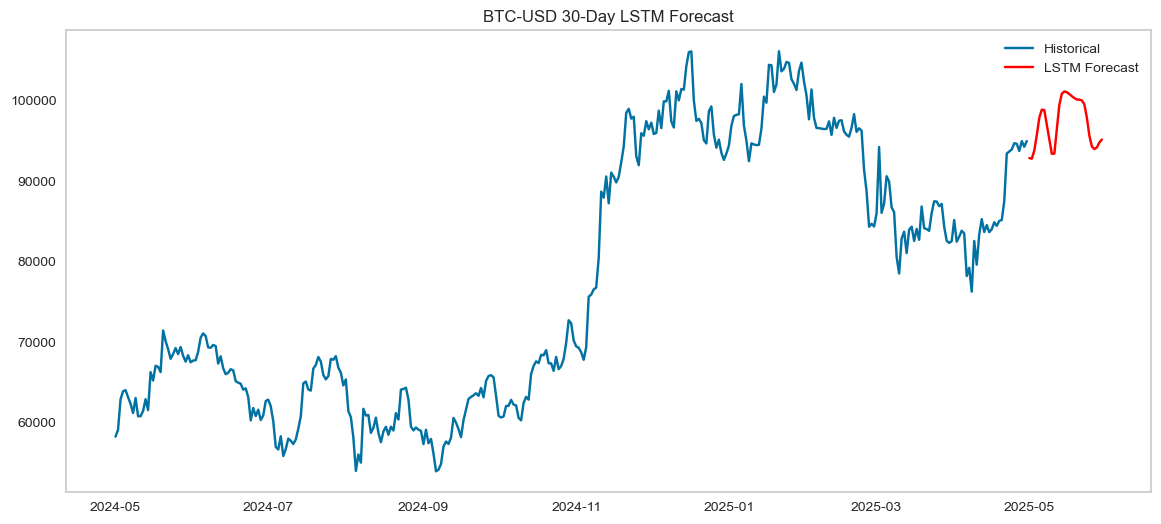

In [152]:
# 4. Plot results
plt.figure(figsize=(14, 6))
plt.plot(df_btc['ds'], df_btc['y'], label='Historical')
plt.plot(forecast['ds'], forecast['LSTM'], label='LSTM Forecast', color='red')
plt.title('BTC-USD 30-Day LSTM Forecast')
plt.legend()
plt.grid()
plt.show()

In [153]:
# Rebuild the signal column
df_btc['signal'] = 0
for i in range(1, len(df_btc)):
    if df_btc['y'].iloc[i] > df_btc['y'].iloc[i-1] + 2000:
        df_btc.loc[df_btc.index[i], 'signal'] = 1
    elif df_btc['y'].iloc[i] < df_btc['y'].iloc[i-1] - 2000:
        df_btc.loc[df_btc.index[i], 'signal'] = -1


In [125]:
import plotly.graph_objects as go

In [154]:
fig = go.Figure()

# Add historical data trace
fig.add_trace(go.Scatter(
    x=df_btc['ds'],
    y=df_btc['y'],
    mode='lines',
    name='Historical BTC Price'
))
fig.add_trace(go.Scatter(
    x=forecast['ds'], 
    y = forecast['LSTM'], 
    name ='LSTM Forecast'
))
# Add Buy Signal Markers
buy_signals = df_btc[df_btc['signal'] == 1]
fig.add_trace(go.Scatter(
    x=buy_signals['ds'],
    y=buy_signals['y'],
    mode='markers',
    marker=dict(symbol='circle', size=6, color='green'),
    name='Buy Signal'
))

# Add Sell Signal Markers
sell_signals = df_btc[df_btc['signal'] == -1]
fig.add_trace(go.Scatter(
    x=sell_signals['ds'],
    y=sell_signals['y'],
    mode='markers',
    marker=dict(symbol='circle', size=6, color='red'),
    name='Sell Signal'
))
# Customize the layout
fig.update_layout(
    title='BTC-USD Price Forecast with LSTM',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    template='plotly_white'  # Optional: Use a clean template

)
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)
# Show the plot
fig.show()

In [155]:
# Save it as an HTML file
pio.write_html(fig, file='btc_LSTM_30.html', auto_open=False)

In [156]:
df_full = fetch_data()
# Clean BTC-only data for LSTM
df_btc = df_full[['BTC-USD']].copy()
df_btc = df_btc.dropna()  # Drop rows with missing BTC prices
# Prepare for NeuralForecast
df_btc['ds'] = pd.to_datetime(df_btc.index)
df_btc['y'] = df_btc['BTC-USD']
df_btc['unique_id'] = 'BTC-USD'
# Only keep required columns
df_btc = df_btc[['unique_id', 'ds', 'y']]

[*********************100%***********************]  30 of 30 completed


In [ ]:
# Train LSTM
lstm_model = LSTM(
    h=1,
    input_size=60,
    max_steps=500,
    loss=MAE(),
    scaler_type='standard'
)

Seed set to 1


In [159]:
nf = NeuralForecast(models=[lstm_model], freq='D')
nf.fit(df=df_btc)
forecast = nf.predict()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | hist_encoder | LSTM          | 199 K  | train
4 | mlp_decoder  | MLP           | 16.6 K | train
-------------------------------------------------------
215 K     Trainable params
0         Non-trainable params
215 K     Total params
0.863     Total estimated model params size (MB)
10        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [160]:
# Rebuild the signal column
df_btc['signal'] = 0
for i in range(1, len(df_btc)):
    if df_btc['y'].iloc[i] > df_btc['y'].iloc[i-1] + 2000:
        df_btc.loc[df_btc.index[i], 'signal'] = 1
    elif df_btc['y'].iloc[i] < df_btc['y'].iloc[i-1] - 2000:
        df_btc.loc[df_btc.index[i], 'signal'] = -1

fig = go.Figure()

# Add historical data trace
fig.add_trace(go.Scatter(
    x=df_btc['ds'],
    y=df_btc['y'],
    mode='lines',
    name='Historical BTC Price'
))
fig.add_trace(go.Scatter(
    x=forecast['ds'], 
    y = forecast['LSTM'], 
    name ='LSTM Forecast'
))
# Add Buy Signal Markers
buy_signals = df_btc[df_btc['signal'] == 1]
fig.add_trace(go.Scatter(
    x=buy_signals['ds'],
    y=buy_signals['y'],
    mode='markers',
    marker=dict(symbol='circle', size=6, color='green'),
    name='Buy Signal'
))

# Add Sell Signal Markers
sell_signals = df_btc[df_btc['signal'] == -1]
fig.add_trace(go.Scatter(
    x=sell_signals['ds'],
    y=sell_signals['y'],
    mode='markers',
    marker=dict(symbol='circle', size=6, color='red'),
    name='Sell Signal'
))
# Customize the layout
fig.update_layout(
    title='BTC-USD Price Forecast with LSTM',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    template='plotly_white'  # Optional: Use a clean template

)
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)
# Show the plot
fig.show()

In [161]:
# Save it as an HTML file
pio.write_html(fig, file='btc_LSTM_1.html', auto_open=False)

In [162]:
df_full = fetch_data()
# Clean BTC-only data for LSTM
df_btc = df_full[['BTC-USD']].copy()
df_btc = df_btc.dropna()  # Drop rows with missing BTC prices
# Prepare for NeuralForecast
df_btc['ds'] = pd.to_datetime(df_btc.index)
df_btc['y'] = df_btc['BTC-USD']
df_btc['unique_id'] = 'BTC-USD'
# Only keep required columns
df_btc = df_btc[['unique_id', 'ds', 'y']]

[*********************100%***********************]  30 of 30 completed


In [163]:
# Train LSTM
lstm_model = LSTM(
    h=7,
    input_size=60,
    max_steps=500,
    loss=MAE(),
    scaler_type='standard'
)

Seed set to 1


In [164]:
nf = NeuralForecast(models=[lstm_model], freq='D')
nf.fit(df=df_btc)
forecast = nf.predict()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | hist_encoder | LSTM          | 199 K  | train
4 | mlp_decoder  | MLP           | 16.6 K | train
-------------------------------------------------------
215 K     Trainable params
0         Non-trainable params
215 K     Total params
0.863     Total estimated model params size (MB)
10        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [165]:
# Rebuild the signal column
df_btc['signal'] = 0
for i in range(1, len(df_btc)):
    if df_btc['y'].iloc[i] > df_btc['y'].iloc[i-1] + 2000:
        df_btc.loc[df_btc.index[i], 'signal'] = 1
    elif df_btc['y'].iloc[i] < df_btc['y'].iloc[i-1] - 2000:
        df_btc.loc[df_btc.index[i], 'signal'] = -1

fig = go.Figure()

# Add historical data trace
fig.add_trace(go.Scatter(
    x=df_btc['ds'],
    y=df_btc['y'],
    mode='lines',
    name='Historical BTC Price'
))
fig.add_trace(go.Scatter(
    x=forecast['ds'], 
    y = forecast['LSTM'], 
    name ='LSTM Forecast'
))
# Add Buy Signal Markers
buy_signals = df_btc[df_btc['signal'] == 1]
fig.add_trace(go.Scatter(
    x=buy_signals['ds'],
    y=buy_signals['y'],
    mode='markers',
    marker=dict(symbol='circle', size=6, color='green'),
    name='Buy Signal'
))

# Add Sell Signal Markers
sell_signals = df_btc[df_btc['signal'] == -1]
fig.add_trace(go.Scatter(
    x=sell_signals['ds'],
    y=sell_signals['y'],
    mode='markers',
    marker=dict(symbol='circle', size=6, color='red'),
    name='Sell Signal'
))
# Customize the layout
fig.update_layout(
    title='BTC-USD Price Forecast with LSTM',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    template='plotly_white'  # Optional: Use a clean template

)
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)
# Show the plot
fig.show()

In [166]:
# Save it as an HTML file
pio.write_html(fig, file='btc_LSTM_7.html', auto_open=False)